Training...
0.762477777778
Training...
0.768522222222
Training...
0.770833333333
Training...
0.768344444444
Training...
0.769188888889
Training...
0.768622222222
Training...
0.768077777778
Training...
0.767933333333
Training...
0.7694
Training...
0.768411111111


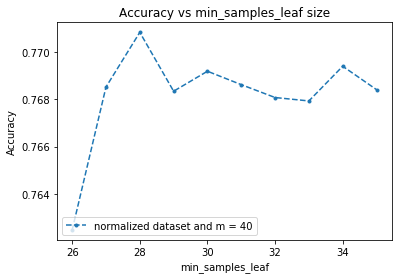

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

from numpy import genfromtxt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA

# Read train file
un_trainX = genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = genfromtxt("trainLabel.csv", delimiter=',')

# Read test file
un_testX = genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = genfromtxt("validationLabel.csv", delimiter=',')


# Select features
selection = SelectKBest(k=120).fit(n_trainX, trainLabel)
n_trainX_new = selection.transform(n_trainX)
n_testX_new = selection.transform(n_testX)


# Bagging and Random Forests
accuracy = []
min_samples_leaf = []
for i in range(10):
    print("Training...")
    min_samples_leaf.append(i + 26)
    # train normalized dataset
    clf = RandomForestClassifier(n_estimators = 40, min_samples_leaf = i + 1, random_state = 0)
    clf.fit(n_trainX_new, trainLabel)
    
    # compute accuracy
    result = clf.score(n_testX_new, testLabel)
    print(result)
    accuracy.append(result)
    
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Accuracy vs min_samples_leaf size')

plt.plot(min_samples_leaf, accuracy, '--.', label = 'normalized dataset and m = 40')
plt.legend(loc='lower left')
plt.show()



In [ ]:
# m = [20, 25, 50]

# # Bagging and Random Forests q1
# accuracy = []
# for i in range(len(m)):
#     # train normalized dataset
#     clf = RandomForestClassifier(n_estimators = m[i], random_state = 0)
#     clf.fit(n_trainX, trainLabel)
    
#     # compute accuracy
#     accuracy.append(clf.score(n_testX, testLabel))
    
# plt.xlabel('m')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs number of bootstrap samples')

# plt.plot(m, accuracy, '--.', label = 'normalized dataset')
# plt.legend(loc='lower right')
# plt.show()